# Data Preparation

In [ ]:
# Essential library
import pandas as pd

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Changing the work directory
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks")

In [ ]:
# Load CSVs
Rainbow = pd.read_csv("JumpTradingInterview-Fills.RAINBOW.csv")
Unicorn = pd.read_csv("JumpTradingInterview-Fills.UNICORN.csv")

In [ ]:
# Concatenate the two files
df = pd.concat([Rainbow, Unicorn], axis=0, ignore_index=True)

In [ ]:
# Check for NA and duplicates
df.fillna(0, inplace=True)
df.drop_duplicates(inplace=True)

In [ ]:
# Converting the timestamps
df['ExchangePublishTimestamp'] = pd.to_datetime(df['ExchangePublishTimestamp'],unit='ns')
df['ExchangeReceiptTimestamp'] = pd.to_datetime(df['ExchangeReceiptTimestamp'],unit='ns')

'''
Using ns instead of ms as unit because with the latter, there's some out of bound dates like
2262-04-14 21:38:50. This date also doesn't make sense comsidering this a trading fill report.
With ns this is avoided.
'''

"\n Using ns instead of ms as unit because with the latter, there's some out of bound dates like \n2262-04-14 21:38:50. This date also doesn't make sense comsidering this a trading fill report.\nWith ns this is avoided.\n"

In [ ]:
# Combine into one single CSV
df.to_csv("Fills-Combined.csv", index=False)

# Symbol Based Analaysis

In [ ]:
# Fill Distrubution by Symbol
symbol_counts = df['Symbol'].value_counts()
print(symbol_counts)

Symbol
RAINBOWZ0    848043
UNICORNZ0    581329
Name: count, dtype: int64


From the above, Symbol='RAINBOWZ0' is traded more than 'UNICORNZ0'. Let's see how they vary by Firm and Trader.

In [ ]:
# Group by Firm and Symbol and count number of trades
firm_symbol_analysis = df.groupby(['Firm', 'Symbol'])['OrderId'].count().unstack()

# Adding a total trades column for each Firm
firm_symbol_analysis['Total Trades'] = firm_symbol_analysis.sum(axis=1)

# Adding a column for %
firm_symbol_analysis['RainBow %']=(firm_symbol_analysis['RAINBOWZ0']/firm_symbol_analysis['Total Trades'])*100

# Sort by Total Trades
firm_symbol_analysis = firm_symbol_analysis.sort_values(by='RainBow %', ascending=False)

print(f"Trade Activity By Firm: {firm_symbol_analysis}")

Trade Activity By Firm: Symbol  RAINBOWZ0  UNICORNZ0  Total Trades  RainBow %
Firm                                                 
SAU         86019      21753        107772  79.815722
IOU        124586      63625        188211  66.194856
KNR        130712      71356        202068  64.687135
UJV        126741      85390        212131  59.746572
YDG         95716      65031        160747  59.544502
ABW        169976     124385        294361  57.744063
NJG         66668      80826        147494  45.200483
EIN         47625      68963        116588  40.848972


So even though Firm='SAU' is 3rd from the bottom in terms of Total Trades, the % of Trades is the highest while Firm='ABW' has the highest number of trades, but 3rd from bottom in terms of %. We can say that although 'ABW' is more active for 'RAINBOWZ0', 'SAU' is more effective.
We also see that 'ABW' is the most active Firm overall.
Another Interesting thing is 'NJG' and 'EIN' focus more on 'UNICORNZ0' than 'RAINBOWZ0'.

In [ ]:
# Group by Trader and Symbol and count number of trades
trader_symbol_analysis = df.groupby(['Trader', 'Symbol'])['OrderId'].count().unstack()

# Since there's a lot of NaN in the result, changing them to 0
trader_symbol_analysis=trader_symbol_analysis.fillna(0)

# Adding a total trades column for each Trader
trader_symbol_analysis['Total Trades'] = trader_symbol_analysis.sum(axis=1)

# Adding a column for %
trader_symbol_analysis['RainBow %']=(trader_symbol_analysis['RAINBOWZ0']/trader_symbol_analysis['Total Trades'])*100

# Sort by Total Trades
trader_symbol_analysis = trader_symbol_analysis.sort_values(by='RainBow %', ascending=False)

print(f"Trade Activity By Trader: {trader_symbol_analysis}")

Trade Activity By Trader: Symbol  RAINBOWZ0  UNICORNZ0  Total Trades  RainBow %
Trader                                               
ASY       39280.0        0.0       39280.0      100.0
BJA       59338.0        0.0       59338.0      100.0
EBJ      102166.0        0.0      102166.0      100.0
GWS       37187.0        0.0       37187.0      100.0
HFW       46346.0        0.0       46346.0      100.0
JFX       68884.0        0.0       68884.0      100.0
LFH       45086.0        0.0       45086.0      100.0
KOX       67403.0        0.0       67403.0      100.0
LYW       47625.0        0.0       47625.0      100.0
VRP       48832.0        0.0       48832.0      100.0
VHA       57870.0        0.0       57870.0      100.0
YLO       67810.0        0.0       67810.0      100.0
ZGS       55702.0        0.0       55702.0      100.0
SCK       37846.0        0.0       37846.0      100.0
WNT       66668.0        0.0       66668.0      100.0
GXU           0.0    33539.0       33539.0        0.0
NB

We see there's no trader who trade for both symbols. 'EBJ' and 'GWS' have done the most and least trades respectively for symbol 'RAINBOWZ0' while for 'UNICORNZ0', 'TCF' and 'PAM' have the most and least trades respectively.

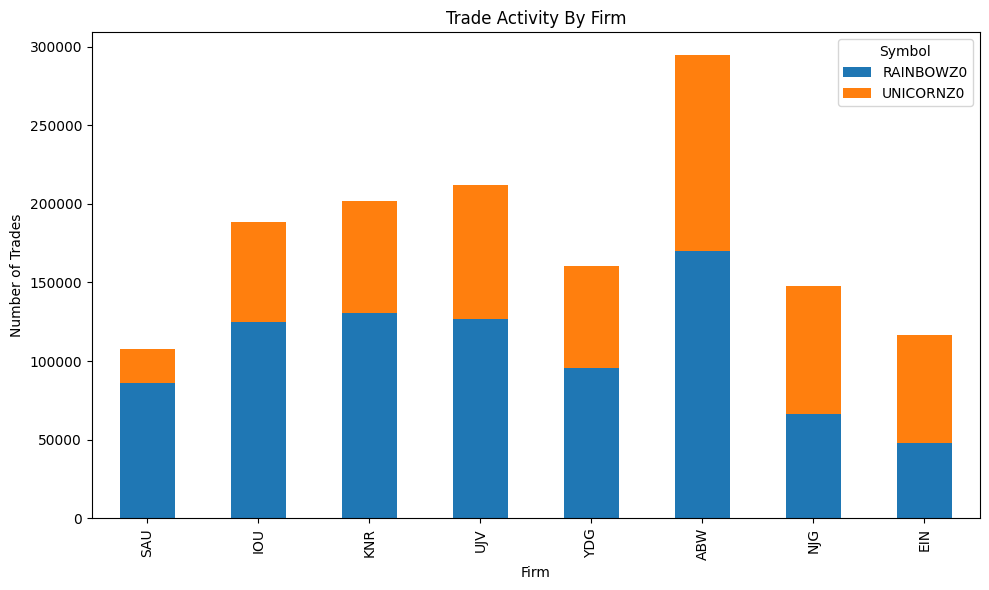

In [ ]:
# Bar chart to analyse the result for Firms
import matplotlib.pyplot as plt

firm_symbol_analysis[['RAINBOWZ0','UNICORNZ0']].plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Trade Activity By Firm')
plt.xlabel('Firm')
plt.ylabel('Number of Trades')
plt.legend(title='Symbol')
plt.tight_layout()
plt.show()

In [ ]:
# Price Behaviour by Symbol
df.groupby('Symbol')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Symbol,,,,,,,,
RAINBOWZ0,848043.0,5.221565e+05,564.321989,520675.0,521775.0,522150.0,522600.0,523350.0
UNICORNZ0,581329.0,1.404017e+06,1772.839359,1399550.0,1402825.0,1403875.0,1405075.0,1409175.0


1.   We see that 'RAINBOWZ0' has a higher average price than 'UNICORNZ0'.
2.   But the latter demonstrates greater price volatility with a standard deviation of 1772.839 as compared to 564.321 for 'RAINBOWZ0'.
3. Lastly, as expected, 'UNICORNZ0' has a wider price range than 'RAINBOWZ0'.

In [ ]:
# Quantity by symbol
df.groupby('Symbol')['Quantity'].describe()

,count,mean,std,min,25%,50%,75%,max
Symbol,,,,,,,,
RAINBOWZ0,848043.0,2.500027,5.588240,1.0,1.0,1.0,2.0,588.0
UNICORNZ0,581329.0,1.276551,1.099884,1.0,1.0,1.0,1.0,67.0


1.   Large orders are more common for 'RAINBOWZ0', which was expected as it is traded more.
2.   The max quantity ever traded was 588 for 'RAINBOWZ0'. This is huge compared to 'UNICORNZ0' which has a max quantity of 67. One reason looks to be because 'UNICORNZ0' has a higher price volatility.



# Price Analysis

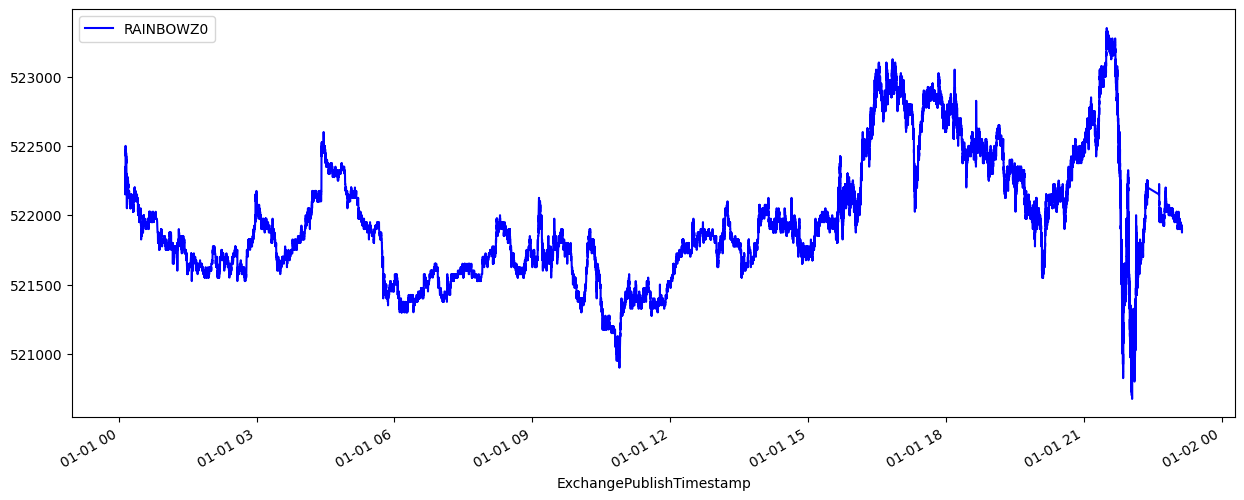

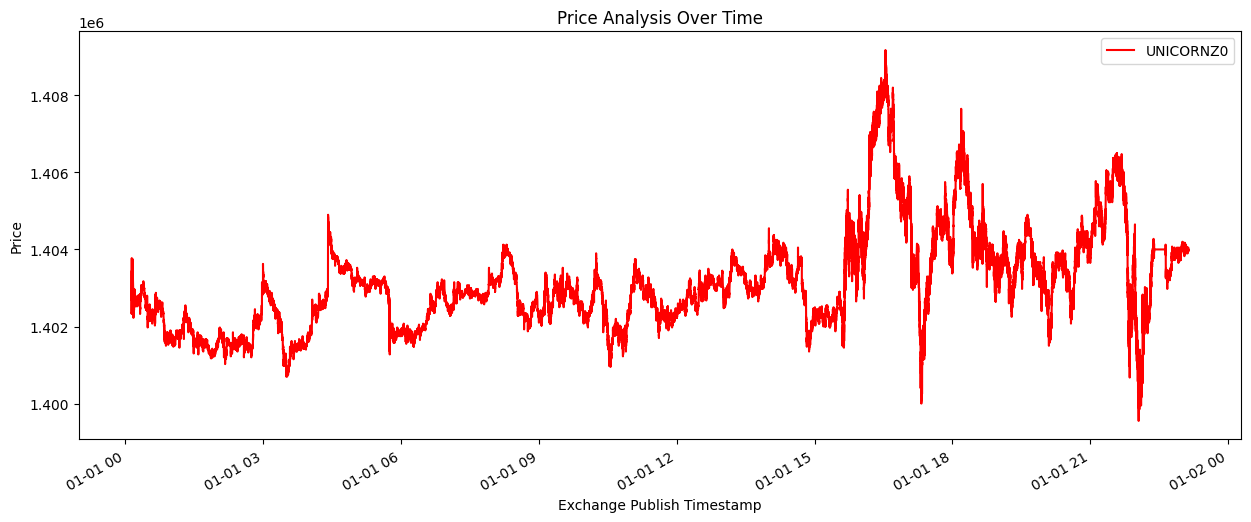

In [ ]:
# Price Analysis Over Time
df=df.sort_values(by='ExchangePublishTimestamp')

# Different colours for each symbol
colours = {'RAINBOWZ0': 'blue', 'UNICORNZ0': 'red'}

# Plot the data with custom colours
for symbol, group in df.groupby('Symbol'):
    group.plot(x='ExchangePublishTimestamp', y='Price', figsize=(15,6), label=symbol, color=colours[symbol])

plt.title('Price Analysis Over Time')
plt.xlabel('Exchange Publish Timestamp')
plt.ylabel('Price')
plt.legend()
plt.show()

We see that both symbols show a fairly similar trend. The ups and downs are quite similar till '01-01-15'. After that differences become more prominent. For example, the highest spike in price for 'UNICORNZ0' occurs between '01-01-15' and '01-01'18 while the highest spike for 'RAINBOZ0' occurs after '01-01-21'. Interesting thing is that the biggest drop for both happened around the same time. Seems the market dynamics effected both simultaneously. Factors could be news events, regulatory changes etc.

In [ ]:
# Price Differences by Order Type
price_by_order_type = df.groupby(['IsBuy','IsAggressor'])['Price'].mean().unstack()
print("Average Price By Order Type:")
print(price_by_order_type)

# Caclculating the count of trades for context
count_by_order_type = df.groupby(['IsBuy','IsAggressor'])['OrderId'].count().unstack()
print("Count By Order Type:")
print(count_by_order_type)

Average Price By Order Type:
IsAggressor          False         True 
IsBuy                                   
False        836477.143207  967191.90735
True         839025.917766  959206.97218
Count By Order Type:
IsAggressor   False   True 
IsBuy                      
False        467512  245031
True         471253  245576


We see that the average price for aggressive buy orders is significantly higher than passive buy orders. This probably suggests that aggressive buyers are willing to pay premium to acquire the order immediately. Similarly, the average price for a sell order is also higher than passive ones indicating the sellers are willing to lower price to dispose of an asset quickly.
We also infer that the average buy prices are way higher than sell prices indicating a buying pressure in the market. One reason could be simply because of mismatch of supply and demand which is driving the prices up.
Analysing the count by order type report, we see that there's an overall higher count of passive buys/sells than aggressive ones indicating the buyers are approaching by caution. This lines correctly with the above observation where we inferred that there's a market instability. In a nutshell, it's neither bearish nor bullish.

# Order type Analysis

Buy vs Sell behaviour by symbol:
Symbol  RAINBOWZ0  UNICORNZ0   Total
IsBuy                               
False      422257     290286  712543
True       425786     291043  716829


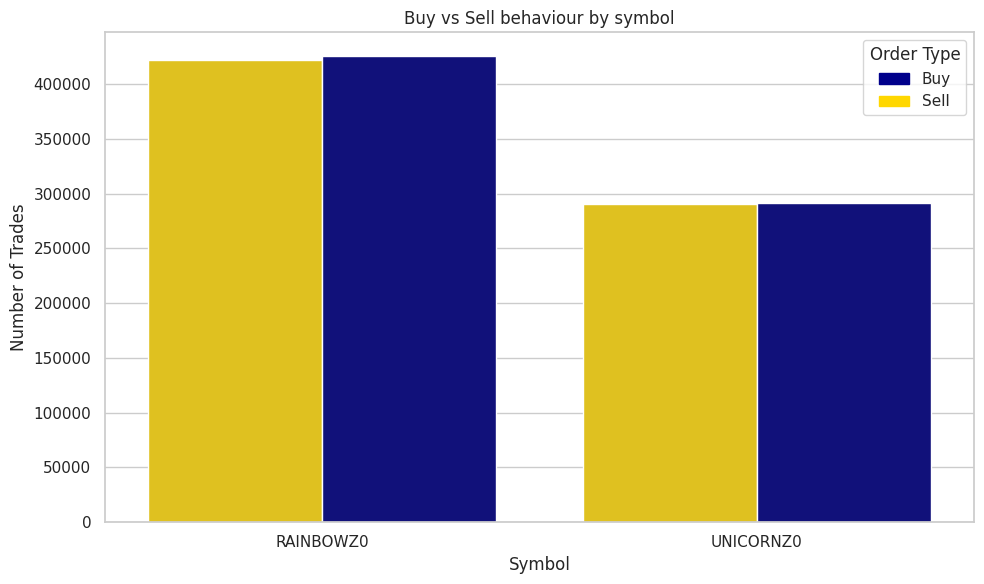

In [ ]:
# Buy vs Sell behaviour by symbol
buy_vs_sell_by_symbol = df.groupby(['IsBuy','Symbol'])['OrderId'].count().unstack()

# Adding a total field
buy_vs_sell_by_symbol['Total'] = buy_vs_sell_by_symbol.sum(axis=1)
print("Buy vs Sell behaviour by symbol:")
print(buy_vs_sell_by_symbol)

# Representing in a graph
import seaborn as sns
import numpy as np

# Removing the total field as it's not needed for the visualisation
buy_vs_sell_melted = buy_vs_sell_by_symbol.drop(columns=['Total']).melt(
    ignore_index=False, var_name='Symbol', value_name='Count').reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Symbol', y='Count', hue='IsBuy', data=buy_vs_sell_melted,
            palette={np.True_: 'darkblue', np.False_: 'gold'})

# Create custom legend handles
handles = [plt.Rectangle((0,0),1,1, color=c) for c in ['darkblue', 'gold']]
labels= ["Buy", "Sell"]

# Add legend using custom handles and labels
plt.legend(handles, labels, title="Order Type")
plt.title('Buy vs Sell behaviour by symbol')
plt.ylabel('Number of Trades')
plt.xlabel('Symbol')
plt.tight_layout()
plt.show()

So, from the above result we see that buy orders are slightly higher than sell orders. Same goes when we differentiate it by symbol. We cannot clearly say that the market is showing a bullish sentiment as the slight difference can be statistically insignificant. Going by the previous analysis and the fact that total buy orders are slightly higher than sell orders, it represents a more neutral sentiment with both buying and selling is approached with caution.

In [ ]:
# Aggressive vs Passive behaviour by symbol
aggr_vs_pass_by_symbol = df.groupby(['IsAggressor','Symbol'])['OrderId'].count().unstack()

# Adding a total field
aggr_vs_pass_by_symbol['Total'] = aggr_vs_pass_by_symbol.sum(axis=1)
print("Aggressive vs Passive behaviour by symbol:")
print(aggr_vs_pass_by_symbol)

Aggressive vs Passive behaviour by symbol:
Symbol       RAINBOWZ0  UNICORNZ0   Total
IsAggressor                              
False           602809     335956  938765
True            245234     245373  490607


From above results, 'Passive' approach outweighs 'Aggressive' approach quite significantly. This falls in line with all the inferences we have done so far. The market has a neutral sentiment, and people are willing to wait for their instrument to reach a specific price.

In [ ]:
# Impact on price and quantity
price_and_quantity = df.groupby(['Symbol','IsBuy','IsAggressor'])[['Price', 'Quantity']].mean()
print("Impact on Price and Quanity:")
print(price_and_quantity)

Impact on Price and Quanity:
                                    Price  Quantity
Symbol    IsBuy IsAggressor                        
RAINBOWZ0 False False        5.221704e+05  1.768085
                True         5.221342e+05  4.351738
          True  False        5.221547e+05  1.749326
                True         5.221488e+05  4.293466
UNICORNZ0 False False        1.404065e+06  1.105263
                True         1.403976e+06  1.511778
          True  False        1.403995e+06  1.104048
                True         1.404022e+06  1.512045


*   Aggressive orders have a larger quantity than passive orders even though the price is almost similar. This is same for 'Sell' orders. This is possibly because the traders believe the market could go up soon. Aggressive selling means there could be market makers involved in thess transactions.
*   The above observation is exactly true for both symbols highlighting an uniformity in the market when it comes to this. Although the difference in the total quantity for aggressive and passive orders is minute for 'UNICORNZ0' as compared to 'RAINBOWZ0'.
*   Traders are willing to buy at a higher price and incur a loss when selling. Since there is an instability between demand and supply, it seems more reasonable for traders to work that way.
*   The reason to sell aggressive in a high demand market could be many reasons such as Liquidity Provision, Hedging or in the case of Algorithmic Trading, these algorithms can react very quickly to small changes in market conditions.

# Latency Analysis

In [ ]:
# Latency by Order Type
df['Latency']=df['ExchangeReceiptTimestamp']-df['ExchangePublishTimestamp']
latency_by_order_type = df.groupby(['IsBuy','IsAggressor'])['Latency'].mean()
print("Average Latency By Order Type:")
print(latency_by_order_type)

Average Latency By Order Type:
IsBuy  IsAggressor
False  False         -1 days +23:59:59.999490671
       True          -1 days +23:59:59.999529877
True   False         -1 days +23:59:59.999497229
       True          -1 days +23:59:59.999539100
Name: Latency, dtype: timedelta64[ns]


Latency looks fairly same across buy or sell orders regardless of whether they’re aggressive or passive. Very minute difference between them and they're all executed one day after.

In [ ]:
# Latency by Symbol
latency_by_symbol = df.groupby(['Symbol'])['Latency'].mean()
print("Average Latency By Symbol:")
print(latency_by_symbol)

Average Latency By Symbol:
Symbol
RAINBOWZ0   -1 days +23:59:59.999543664
UNICORNZ0   -1 days +23:59:59.999455664
Name: Latency, dtype: timedelta64[ns]


Again, not much variance to distinguish between the 2 symbols.

# Firm Performance Analysis

In [ ]:
# Activity by Firm (Number of Trades and Total Quantity)
activity_by_firm = df.groupby(['Firm']).agg({'OrderId': 'count', 'Quantity': 'sum'}).rename(columns={'OrderId': 'Trade Count', 'Quantity': 'Total Quantity'})
activity_by_firm.sort_values(by='Trade Count', ascending=False, inplace=True)
print("Activity by Firm:")
print(activity_by_firm)

# Average Price by Firm, split by IsBuy and Symbol
avg_firm_price = df.groupby(['Firm','IsBuy','Symbol'])['Price'].mean().unstack(level=[1,2])
print("\nAverage Price By Firm (Split By IsBuy and Symbol):")
print(avg_firm_price)

# Aggressiveness by Firm and Symbol
agg_by_firm = df.groupby(['Firm','Symbol'])['IsAggressor'].mean().unstack()*100
agg_by_firm.sort_values(by='RAINBOWZ0', ascending=False, inplace=True)
print("\nAggressiveness By Firm and Symbol:")
print(agg_by_firm)

Activity by Firm:
      Trade Count  Total Quantity
Firm                             
ABW        294361          529213
UJV        212131          426803
KNR        202068          439861
IOU        188211          395884
YDG        160747          322449
NJG        147494          283137
EIN        116588          195368
SAU        107772          269511

Average Price By Firm (Split By IsBuy and Symbol):
IsBuy           False                        True               
Symbol      RAINBOWZ0     UNICORNZ0      RAINBOWZ0     UNICORNZ0
Firm                                                            
ABW     522162.351448  1.404043e+06  522154.214028  1.404011e+06
EIN     522157.889375  1.404040e+06  522161.673176  1.403999e+06
IOU     522160.871987  1.404021e+06  522159.608202  1.403998e+06
KNR     522160.992339  1.404010e+06  522150.018227  1.404021e+06
NJG     522154.900486  1.404018e+06  522155.283190  1.403992e+06
SAU     522158.322999  1.404055e+06  522149.293009  1.403995e+06
UJV  

1.   Activity By Firm
'ABW' is the most active Firm in both Trade Count and Quantity while 'SAU' is least active by Trade Count but 'EIN' by Quantity. 'ABW' handles the bulk of the Trading volume across both Symbols. We can also say that most firms are utilising a block trading strategy. 'NJG' highlights this observation the most where it does fewer trades but higher quantity.

2.   Average Price By Firm
For 'RAINBOWZ0' sells, 'NJG' gets the lowest and 'ABW' the highest average price while for 'UNICORNZ0', it is 'KNR' and 'SAU' get the lowest and highest average respectively.
'EIN' and 'YDG get the highest average buy price and lowest average buy price respectively for 'RAINBOWZ0' while it is 'YDG' and 'NJG with the same for 'UNICORNZ0' symbol.
One interesting observation is 'YDG' is more aggressive or trading at less favourable times with 'UNICORNZ0' symbol than 'RAINBOWZ0'. Another interesting observation is 'NJG' consistently gets lowest sell price for 'RAINBOWZ0' and lowest buy price for 'UNICORNZ0'.
As 'UNICORNZ0' is more expensive, 'NJG' is doing pretty well with their strategy but need to improve the selling strategy for 'RAINBOWZ0'.

3.   Aggressiveness By Firm
'SAU' is most aggressive with 'RAINBOWZ0' and least with 'UNICORNZ0'. This could be because 'RAINBOWZ0' has more trading activity and volume.
'IOU' is most aggressive when it comes to symbol='UNICORNZ0' and 'SAU' is the least. Clearly, 'SAU' prefers trading in 'RAINBOWZ0' than 'UNICORNZ0'.
A quite interesting observation is even though 'ABW' is the most active firm by trade count and quantity as established above, it is very passive with both symbols.
Less aggressive ones like 'ABW' and 'SAU' for 'UNICORNZ0' get better sell price than others suggesting that providing liquidity pays off in this dataset.  




# Predictive Analytics

In [ ]:
# Predict Price
""" Using features like Symbol, IsBuy, IsAggressor, Quantity, Firm, Trader and Hour to predict Price.
"""
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Features and target
df['Hour']=df['ExchangePublishTimestamp'].dt.hour
X=pd.get_dummies(df[['Symbol', 'IsBuy', 'IsAggressor', 'Firm', 'Trader', 'Hour']], drop_first=True)
X['Quantity']=df['Quantity']
y=df['Price']

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 640036.0399673018
R-squared: 0.9999965908869232


The R-squared is very close to 1 indicating the model is a very strong fit. Unfortunately, this could be a sign of overfitting. Optimum solution would be to perform Regularization and Cross-Validation.
Our Mean Squared Error (MSE) is less than the average price. This although suggests the model is performing reasonably well, context is everything. In this dataset, there's a low variance in the target variable which is 'Price'. For such a dataset, a lower MSE than the average price is pretty common.

In [ ]:
# Adding the y_pred column to a dataframe
# Get the indices of the test set from the train_test split
test_indices=X_test.index

# Create a new column and initialise with Nan
df_predict=df
import numpy as np
df_predict['Predicted Price']=np.nan

# Adding the predicted values to the corresponding rows in the DF
df_predict.loc[test_indices, 'Predicted Price']=y_pred

# Save the output into a new CSV
df_predict.to_csv("Fills-Predicted.csv", index=False)